# Natural Language Processing

<img src="https://www.igyaan.in/wp-content/uploads/2015/12/Twitter.jpg" width=800>

### Dataset Download  
You can download the CSV file here:  
[https://www.kaggle.com/competitions/nlp-getting-started/data)

### Introduction
Social media is often used to share information about disasters. However, many tweets contain disaster-related words without describing a real disaster. This makes automatic classification difficult.

The goal of this project is to build a model that can classify tweets as real disaster or non-disaster. The dataset contains tweet text, keywords, and location information. The performance is evaluated using the F1-score.

Several NLP models were tested using TF-IDF vectorization and classical machine learning algorithms.

### Import Libraries

In [57]:
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import joblib

### Load Data

In [2]:
df1=pd.read_csv('train.csv')

In [3]:
df2=pd.read_csv('test.csv')

### EDA

In [4]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df1.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
df2.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [9]:
df1.shape

(7613, 5)

In [10]:
df2.shape

(3263, 4)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [15]:
df1.isna().mean()

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [16]:
df2.isna().mean()

id          0.000000
keyword     0.007968
location    0.338645
text        0.000000
dtype: float64

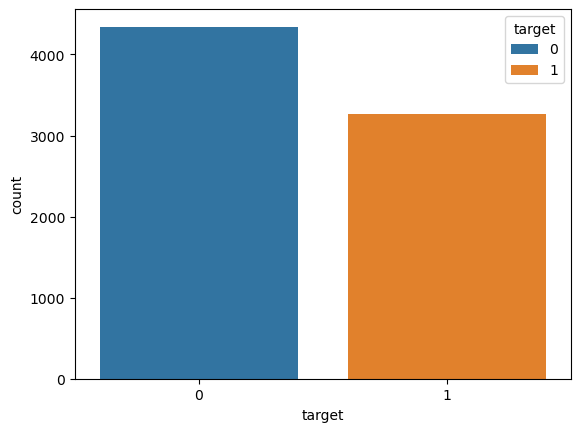

In [18]:
sns.countplot(x=df1['target'],hue=df1['target']);

In [20]:
print(df1.loc[6095, 'text'])

4 equipment ego break upon dig your family internet hoke excepting versus a sinking term: dfLJEV


In [22]:
df1['text'].str.split().apply(len)

0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: text, Length: 7613, dtype: int64

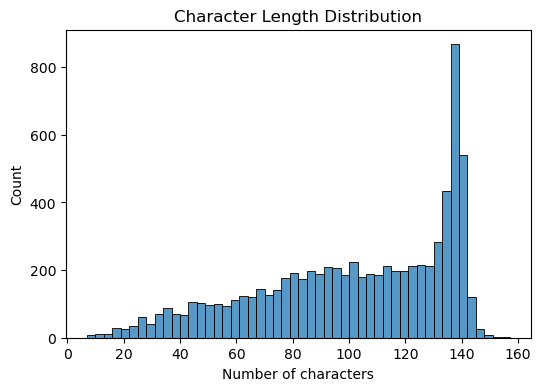

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df1['text'].str.len(), bins=50)
plt.title('Character Length Distribution')
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

Most tweets have between 50 and 140 characters, with a clear peak close to the Twitter character limit.

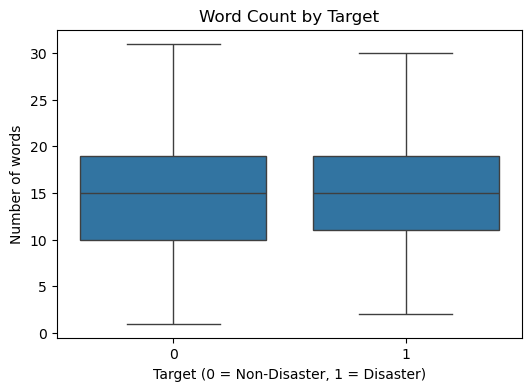

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y=df1['text'].str.split().apply(len), data=df1)
plt.title('Word Count by Target')
plt.xlabel('Target (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of words')
plt.show()

Disaster tweets are slightly longer on average than non-disaster tweets, but the distributions largely overlap.

In [28]:
# disaster tweets
top_disaster_keywords=(df1[df1['target'] == 1]['keyword'].value_counts().head(10))

In [29]:
top_disaster_keywords

keyword
derailment           39
outbreak             39
wreckage             39
debris               37
oil%20spill          37
typhoon              37
rescuers             32
suicide%20bomb       32
suicide%20bombing    32
evacuated            32
Name: count, dtype: int64

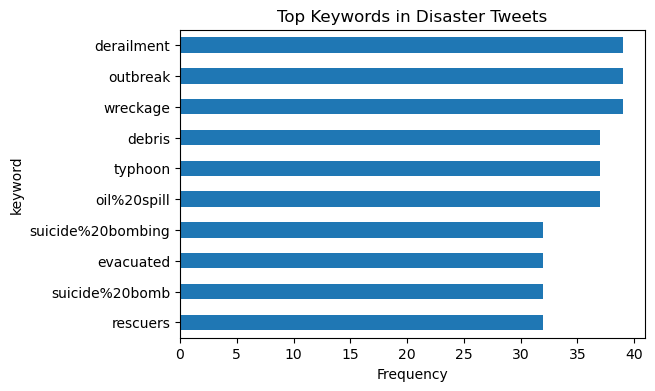

In [34]:
plt.figure(figsize=(6,4))
top_disaster_keywords.sort_values().plot(kind='barh')
plt.title('Top Keywords in Disaster Tweets')
plt.xlabel('Frequency')
plt.show()

Disaster-related tweets frequently contain keywords such as derailment, outbreak, wreckage, typhoon are indicating real emergency events.

In [35]:
# non disaster tweets
top_nondisaster_keywords=(df1[df1['target'] == 0]['keyword'].value_counts().head(10))

In [31]:
top_nondisaster_keywords

keyword
body%20bags    40
armageddon     37
harm           37
deluge         36
ruin           36
wrecked        36
explode        35
fear           35
twister        35
siren          35
Name: count, dtype: int64

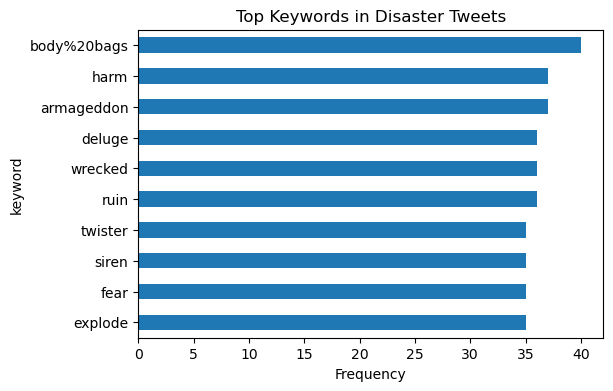

In [33]:
plt.figure(figsize=(6,4))
top_nondisaster_keywords.sort_values().plot(kind='barh')
plt.title('Top Keywords in Disaster Tweets')
plt.xlabel('Frequency')
plt.show()

Non-disaster tweets often include dramatic words like harm, armageddon, explode and fear used in a figurative or non-emergency context.

### Feature Engineering

In [36]:
def build_text(df):
    return (
        df['text'].fillna('') +
        ' [KEY] ' + df['keyword'].fillna('') +
        ' [LOC] ' + df['location'].fillna('')
    )

In [37]:
df1['full_text']=build_text(df1)
df2['full_text']=build_text(df2)

In [38]:
df1[['text', 'keyword', 'location', 'full_text']].head()

,text,keyword,location,full_text
0,Our Deeds are the Reason of this #earthquake M...,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,NaN,NaN,Forest fire near La Ronge Sask. Canada [KEY] ...
2,All residents asked to 'shelter in place' are ...,NaN,NaN,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


### Text Processing

In [39]:
def clean_text(s):
    s=s.lower()
    s=re.sub(r'http\S+|www\.\S+', ' URL ', s)
    s=re.sub(r'@\w+', ' USER ', s)
    s=re.sub(r'\n|\r', ' ', s)
    s=re.sub(r'\s+', ' ', s)
    return s.strip()

In [40]:
df1['full_text']=df1['full_text'].map(clean_text)
df2['full_text']=df2['full_text'].map(clean_text)

In [41]:
df1['full_text'].head(3)

0    our deeds are the reason of this #earthquake m...
1    forest fire near la ronge sask. canada [key] [...
2    all residents asked to 'shelter in place' are ...
Name: full_text, dtype: object

### Modelling

In [42]:
x=df1['full_text']

In [43]:
y=df1['target']

In [44]:
x_train,x_val,y_train,y_val=train_test_split(x,y, random_state=42,test_size=0.20,stratify=y)

In [45]:
print(x_train.shape, x_val.shape)

(6090,) (1523,)


##### Pipeline TfidfVectorizer & LogisticRegression

In [46]:
clr=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.9,sublinear_tf=True)),('classifier',LogisticRegression(max_iter=2000))])

In [47]:
clr.fit(x_train,y_train)

,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [53]:
tahmin=clr.predict(x_val)

In [54]:
accuracy_score(y_val, tahmin)

0.8128693368351937

In [55]:
print(classification_report(y_val, tahmin))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       869
           1       0.83      0.71      0.77       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.81      0.81      0.81      1523



In [58]:
f1=f1_score(y_val, tahmin)

In [59]:
print('Validation F1:', f1)

Validation F1: 0.7662018047579984


In [60]:
f1_macro=f1_score(y_val, tahmin, average='macro')
f1_weighted=f1_score(y_val, tahmin, average='weighted')

In [61]:
print('F1 macro:', f1_macro)
print('F1 weighted:', f1_weighted)

F1 macro: 0.8051041864512487
F1 weighted: 0.8105959868872624


In [62]:
y_val_proba=clr.predict_proba(x_val)[:, 1]

In [63]:
thresholds=np.linspace(0.2, 0.8, 121)
best_f1=0
best_t=0.5

for t in thresholds:
    y_pred_t=(y_val_proba >= t).astype(int)
    f1_t=f1_score(y_val, y_pred_t)
    if f1_t > best_f1:
        best_f1=f1_t
        best_t=t

In [64]:
print('Best threshold:',round(best_t, 3))
print('Best Validation F1:',round(best_f1, 4))

Best threshold: 0.43
Best Validation F1: 0.7779


##### Pipeline TfidfVectorizer & LinearSVC

In [65]:
svc=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.9,sublinear_tf=True)),('classifier',LinearSVC())])

In [66]:
svc.fit(x_train,y_train)

,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [67]:
tahmin2=svc.predict(x_val)

In [68]:
accuracy_score(y_val, tahmin2)

0.8069599474720945

In [69]:
print(classification_report(y_val, tahmin2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       869
           1       0.79      0.75      0.77       654

    accuracy                           0.81      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [70]:
f1=f1_score(y_val, tahmin2)

In [71]:
print('Validation F1:', f1)

Validation F1: 0.7695924764890282


In [72]:
f1_macro=f1_score(y_val, tahmin2, average='macro')
f1_weighted=f1_score(y_val, tahmin2, average='weighted')

In [73]:
print('F1 macro:', f1_macro)
print('F1 weighted:', f1_weighted)

F1 macro: 0.801745390786887
F1 weighted: 0.8062843773752255


In [74]:
scores=svc.decision_function(x_val)

In [75]:
thresholds=np.linspace(scores.min(), scores.max(), 200)

best_f1=0
best_t=0.0

for t in thresholds:
    pred_t=(scores >=t).astype(int)
    f1_t=f1_score(y_val, pred_t)
    if f1_t > best_f1:
        best_f1=f1_t
        best_t=t

In [76]:
print('Best threshold (decision score):', best_t)
print('Best Validation F1:', best_f1)

Best threshold (decision score): -0.053244319466545065
Best Validation F1: 0.7714723926380368


##### Pipeline TfidfVectorizer & MultinomialNB

In [77]:
nb=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.9,sublinear_tf=True,use_idf=False)),('classifier',MultinomialNB(alpha=0.5))])

In [78]:
nb.fit(x_train,y_train)

,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [79]:
tahmin3=nb.predict(x_val)

In [80]:
accuracy_score(y_val,tahmin3)

0.8200919238345371

In [81]:
print(classification_report(y_val, tahmin3))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       869
           1       0.87      0.69      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.80      0.81      1523
weighted avg       0.83      0.82      0.82      1523



In [82]:
f1=f1_score(y_val, tahmin3)

In [83]:
print('Validation F1:', f1)

Validation F1: 0.7666098807495741


In [84]:
f1_macro=f1_score(y_val, tahmin3, average='macro')
f1_weighted=f1_score(y_val, tahmin3, average='weighted')

In [85]:
print('F1 macro:', f1_macro)
print('F1 weighted:', f1_weighted)

F1 macro: 0.8101211796910264
F1 weighted: 0.8162636151949083


In [86]:
y_val_proba3=nb.predict_proba(x_val)[:, 1]

In [87]:
thresholds=np.linspace(0.2, 0.8, 121)
best_f1=0
best_t=0.5

for t in thresholds:
    y_pred_t=(y_val_proba3 >= t).astype(int)
    f1_t=f1_score(y_val, y_pred_t)
    if f1_t > best_f1:
        best_f1=f1_t
        best_t=t

In [88]:
print('Best threshold:',round(best_t, 3))
print('Best Validation F1:',round(best_f1, 4))

Best threshold: 0.405
Best Validation F1: 0.7744


### Test

In [89]:
sub=pd.read_csv('sample_submission.csv')

In [90]:
sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [92]:
x=df1['full_text']

In [93]:
y=df1['target']

In [94]:
final_clf=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.9,sublinear_tf=True)),('classifier',LogisticRegression(max_iter=2000))])

In [95]:
final_clf.fit(x,y)

,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [96]:
joblib.dump(final_clf,'final_clf.pkl')
joblib.dump(0.43, 'threshold.pkl')

['threshold.pkl']

In [97]:
model=final_clf

In [98]:
threshold=0.43

In [99]:
test_proba=model.predict_proba(df2['full_text'])[:, 1]
test_pred=(test_proba >= threshold).astype(int)

In [100]:
submission=pd.DataFrame({'id':df2['id'],'target':test_pred})

In [101]:
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [102]:
submission.shape

(3263, 2)

In [103]:
submission['target'].value_counts()

target
0    1896
1    1367
Name: count, dtype: int64

In [104]:
submission.to_csv('submission.csv', index=False)

### Conclusion
In this project, different NLP models were trained and evaluated using a validation set. Logistic Regression, Linear SVM, and Multinomial Naive Bayes were compared.

The TF-IDF + Logistic Regression model achieved the best result with a validation F1-score of 0.78 after tuning the decision threshold to 0.43. The final model was trained on the full dataset and used to create Kaggle test predictions.